In [16]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l.torch import *
import torch

##### d2l怎么用：看API文档
https://d2l.ai/_modules/d2l/torch.html#Module.plot

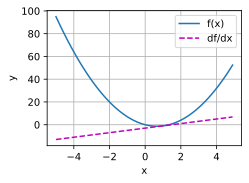

In [15]:
def f(x):
    return 3*x**2-4*x

def df(x):
    return 2*x-3

x = np.arange(-5,5,0.1)
plot(x,[f(x),df(x)],'x','y',legend=['f(x)','df/dx'])

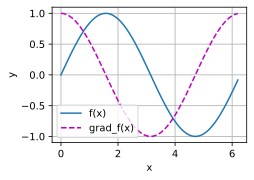

In [43]:
def f(x):
    return sin(x)

def grad_f(x):
    x.requires_grad = True
    y = f(x)
    y.sum().backward()
    return x.grad

x = torch.arange(0,2*math.pi,0.1)
# 画图时要将 tensor转为 numpy()数组
plot(x.detach().numpy(),[f(x).detach().numpy(),grad_f(x).detach().numpy()],'x','y',legend=['f(x)','grad_f(x)'])

In [53]:
def f(a):
    b = a*2
    while b.norm() < 1000:
        b = b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c
a = torch.randn(12,requires_grad=True).reshape(3,4)
d = f(a)
d.sum().backward()
a.grad == d/a

/home/fury/miniconda3/envs/ML/lib/python3.10/site-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352558200/work/build/aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


False